In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
from sklearn.ensemble import RandomForestClassifier

In [2]:
train=pd.read_csv("C:\\Users\\Avirup\\Documents\\Python_datasets\\train_data.csv")
test=pd.read_csv("C:\\Users\\Avirup\\Documents\\Python_datasets\\test_data.csv")

In [3]:
train.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health_Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3,1.0,16,10404.0,0


In [4]:
train=pd.get_dummies(train, columns=['Accomodation_Type','Reco_Insurance_Type','Is_Spouse'], drop_first=True)
test=pd.get_dummies(test, columns=['Accomodation_Type','Reco_Insurance_Type','Is_Spouse'], drop_first=True)

In [5]:
train.isnull().sum()

ID                               0
City_Code                        0
Region_Code                      0
Upper_Age                        0
Lower_Age                        0
Health_Indicator             11691
Holding_Policy_Duration      20251
Holding_Policy_Type          20251
Reco_Policy_Cat                  0
Reco_Policy_Premium              0
Response                         0
Accomodation_Type_Rented         0
Reco_Insurance_Type_Joint        0
Is_Spouse_Yes                    0
dtype: int64

In [6]:
train.dropna(inplace=True)
test.dropna(inplace=True)

In [7]:
train.isnull().sum()

ID                           0
City_Code                    0
Region_Code                  0
Upper_Age                    0
Lower_Age                    0
Health_Indicator             0
Holding_Policy_Duration      0
Holding_Policy_Type          0
Reco_Policy_Cat              0
Reco_Policy_Premium          0
Response                     0
Accomodation_Type_Rented     0
Reco_Insurance_Type_Joint    0
Is_Spouse_Yes                0
dtype: int64

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23548 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         23548 non-null  int64  
 1   City_Code                  23548 non-null  object 
 2   Region_Code                23548 non-null  int64  
 3   Upper_Age                  23548 non-null  int64  
 4   Lower_Age                  23548 non-null  int64  
 5   Health_Indicator           23548 non-null  object 
 6   Holding_Policy_Duration    23548 non-null  object 
 7   Holding_Policy_Type        23548 non-null  float64
 8   Reco_Policy_Cat            23548 non-null  int64  
 9   Reco_Policy_Premium        23548 non-null  float64
 10  Response                   23548 non-null  int64  
 11  Accomodation_Type_Rented   23548 non-null  uint8  
 12  Reco_Insurance_Type_Joint  23548 non-null  uint8  
 13  Is_Spouse_Yes              23548 non-null  uin

In [9]:
train['City_Code']=train.City_Code.str.replace('C','').astype(float)
train['Health_Indicator']=train.Health_Indicator.str.replace('X','').astype(float)
train['Holding_Policy_Duration']=train.Holding_Policy_Duration.str.replace('+','').astype(float)

In [10]:
test['City_Code']=test.City_Code.str.replace('C','').astype(float)
test['Health_Indicator']=test.Health_Indicator.str.replace('X','').astype(float)
test['Holding_Policy_Duration']=test.Holding_Policy_Duration.str.replace('+','').astype(float)

In [11]:
train.head()

,ID,City_Code,Region_Code,Upper_Age,Lower_Age,Health_Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Accomodation_Type_Rented,Reco_Insurance_Type_Joint,Is_Spouse_Yes
0,1,3.0,3213,36,36,1.0,14.0,3.0,22,11628.0,0,1,0,0
3,4,24.0,4378,52,48,1.0,14.0,3.0,19,17780.0,0,0,1,0
4,5,8.0,2190,44,44,2.0,3.0,1.0,16,10404.0,0,1,0,0
5,6,9.0,1785,52,52,2.0,5.0,1.0,22,15264.0,1,1,0,0
7,8,1.0,3175,75,73,4.0,9.0,4.0,17,29344.0,1,0,1,1


C:\Users\Avirup\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


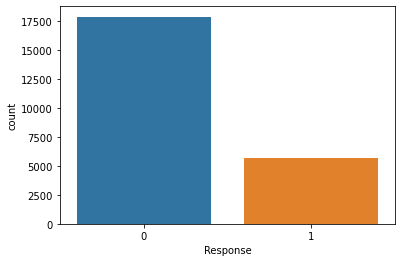

In [12]:
sea.countplot(train['Response'],label="count")
plt.show()

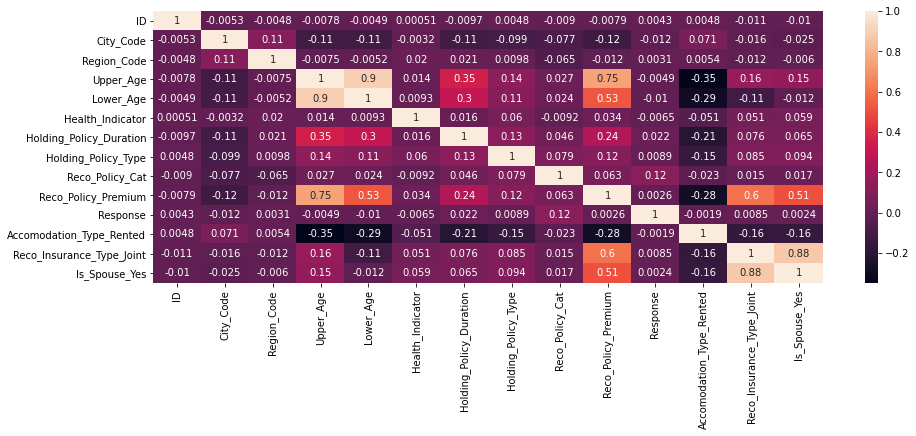

In [13]:
correlation=train.corr()
plt.figure(figsize=(15,5))
sea.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)
plt.show()

In [14]:
x=train.drop('Response', axis=1)
y=train['Response']

In [15]:
rf=RandomForestClassifier(n_estimators=50)
rf.fit(x,y)

RandomForestClassifier(n_estimators=50)

In [16]:
prediction=rf.predict(test)